In [33]:
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector
from qiskit_aer import Aer
from qiskit_aer.noise import NoiseModel, pauli_error
from qiskit.visualization import plot_histogram

# Shor's code algorithm

The Shor's code algorithm encodes a single qubit into a 9-qubit entangled state.
Qubits 0, 3, and 6 are the data qubits, while the others are repetition qubits.

In [34]:
def encode_shor(circuit):
    """Encodes a single qubit using the Shor code."""
    circuit.cx(0, 3) # Copy state from qubit 0 to qubit 3
    circuit.cx(0, 6) # Copy state from qubit 0 to qubit 6
    circuit.h([0, 3, 6])
    for i in [0, 3, 6]:
        circuit.cx(i, i+1)
        circuit.cx(i, i+2)

def bit_flip_correction(circuit):
    """Corrects bit-flip errors using majority voting."""
    # Iterate over the groups of qubits (0-2, 3-5, 6-8)
    for i in [0, 3, 6]:
        # Apply majority voting within each group
        circuit.cx(i, i+1)
        circuit.cx(i, i+2)
        circuit.ccx(i+1, i+2, i)  # Correct the main qubit if needed
    return circuit

def phase_flip_correction(circuit):
    """Corrects phase-flip errors by applying Hadamard gates and correcting bit flips."""
    # Apply Hadamard gates to the logical qubits (0, 3, 6)
    for i in [0, 3, 6]:
        circuit.h(i)
    # Correct bit-flip errors on the logical qubits (0, 3, 6) only
    # TODO: Implement bit-flip correction for the phase
    # Apply Hadamard gates again to the logical qubits (0, 3, 6)
    for i in [0, 3, 6]:
        circuit.h(i)
    return circuit

In [35]:
# Circuit without error correction
circuit_no_correction = QuantumCircuit(9)
encode_shor(circuit_no_correction)
# Simulate a bit-flip error on data qubit
circuit_no_correction.x(0)
# Simulate a phase-flip error on data qubit
circuit_no_correction.z(0)
circuit_no_correction.measure_all()

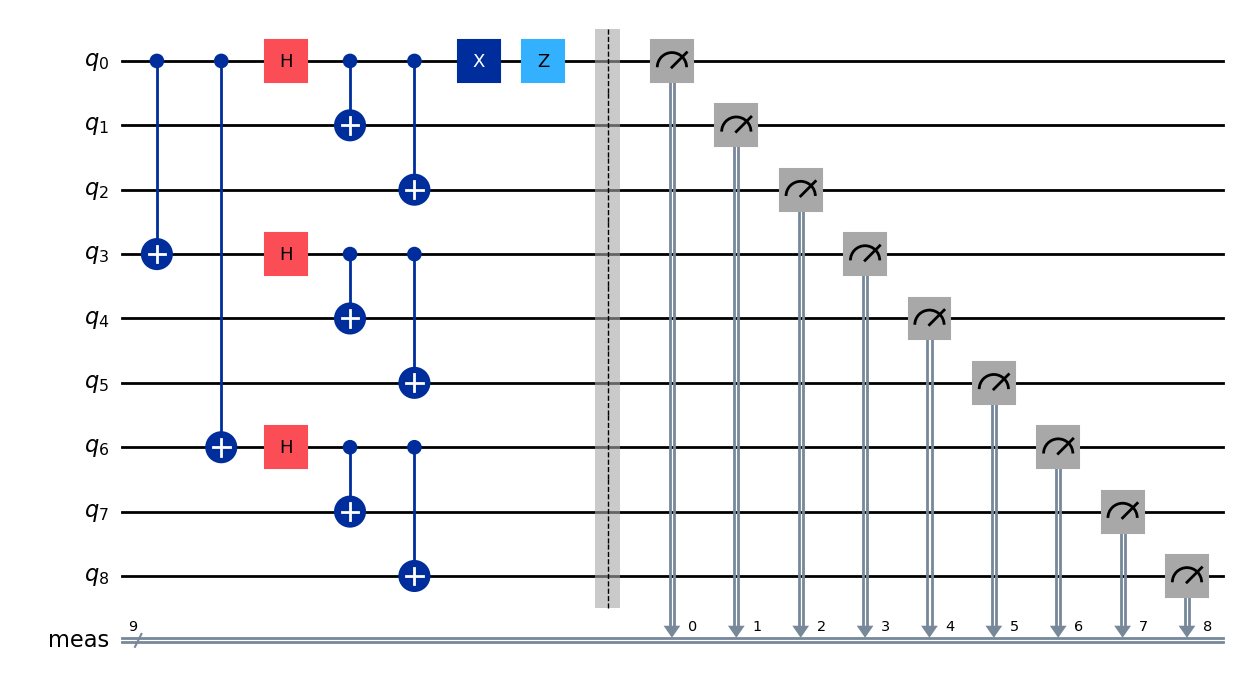

In [36]:
circuit_no_correction.draw('mpl')

In [37]:
# Circuit with error correction
circuit_with_correction = QuantumCircuit(9)
encode_shor(circuit_with_correction)
# Simulate a bit-flip error on data qubit
circuit_with_correction.x(0)
# Simulate a phase-flip error on data qubit
circuit_with_correction.z(0)
circuit_with_correction.barrier()
# Perform error correction
bit_flip_correction(circuit_with_correction)
phase_flip_correction(circuit_with_correction)
circuit_with_correction.measure_all()

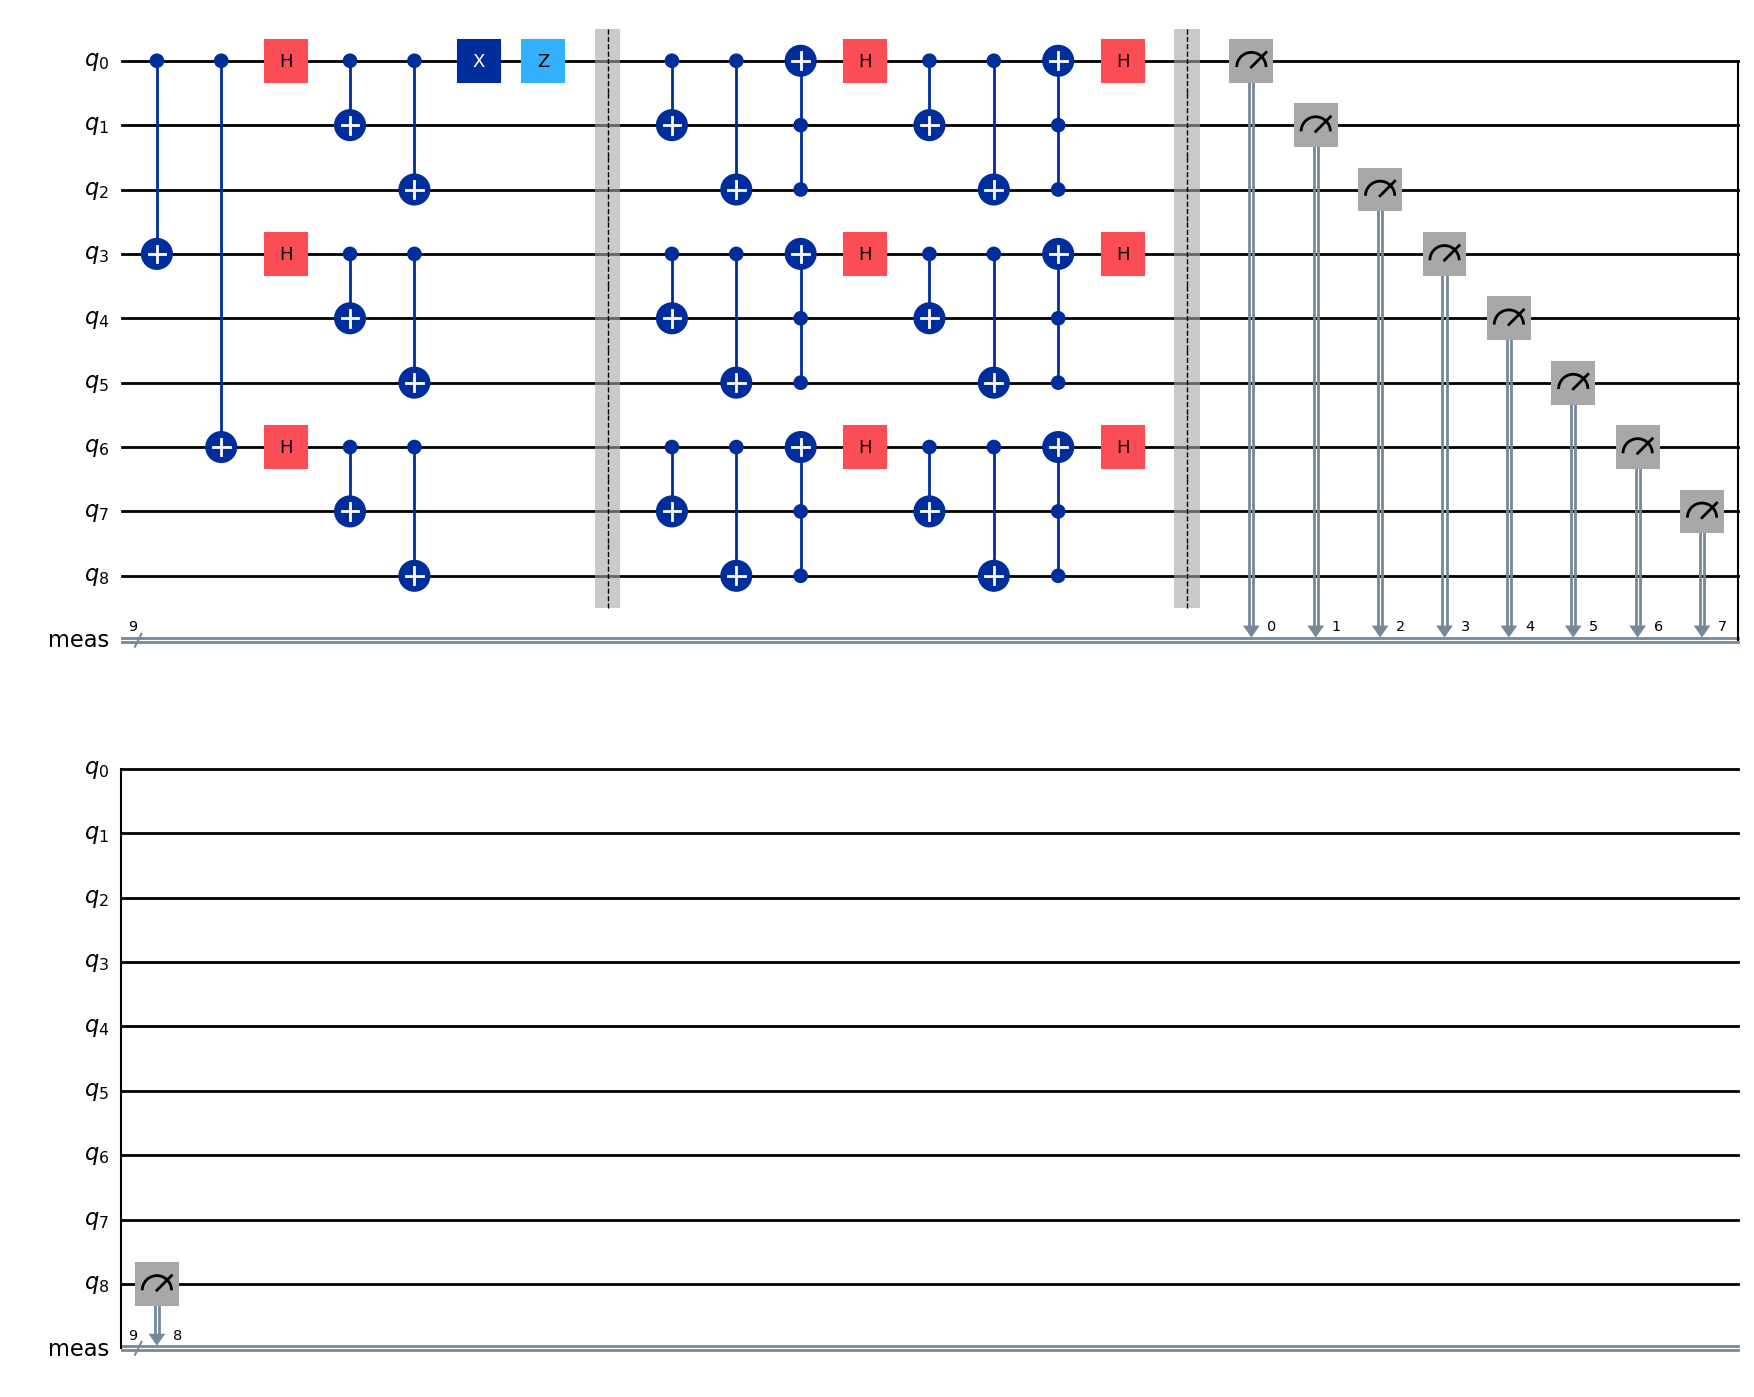

In [38]:
circuit_with_correction.draw('mpl')